In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset loaded successfully
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

 Unique cluster labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)}
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17            

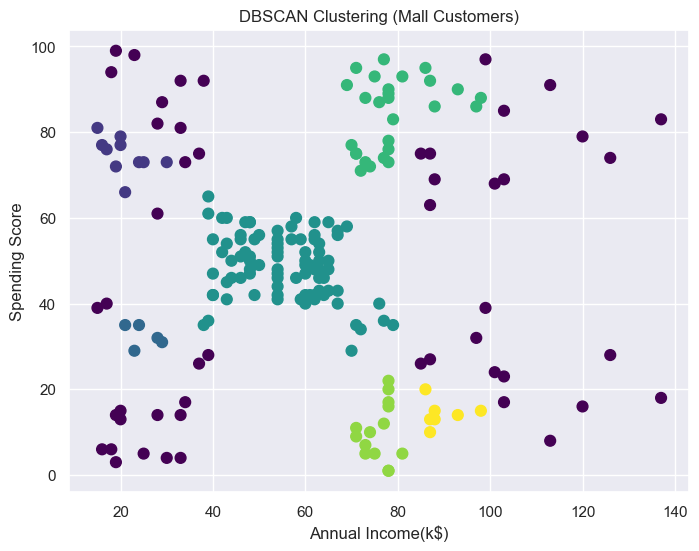


 Cluster counts:
Cluster
 2    87
-1    50
 3    27
 4    14
 0    10
 5     7
 1     5
Name: count, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set()

# load dataset
url = "Mall_Customers.csv"
df = pd.read_csv(url)
print("Dataset loaded successfully")
print(df.head())

# 3) Select Features for Clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) Apply DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

df["Cluster"]=labels

print("\n Unique cluster labels:",set(labels))
print(df.head())

# 5) visualize DBSCAN Cluster
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
c=df["Cluster"], cmap="viridis", s=60)
plt.title("DBSCAN Clustering (Mall Customers)")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score")
plt.show()

# 6) count customers in each cluster
print("\n Cluster counts:")
print(df["Cluster"].value_counts())